### **Install Required Libraries**

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt
! pip install seaborn --upgrade

In [2]:
import warnings
warnings.filterwarnings("ignore")

### **Import Libraries**

In [3]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from joblib import dump, load

### **Loading Datasets**

In [4]:
# Path to the folder containing all CSV files
folder_path = 'C:/Users/balas/OneDrive/Documents/ML Group/bank_transactions/final'

# Load transaction data
csv_files = glob.glob(f'{folder_path}/transactions_*.csv')
csv_files

['C:/Users/balas/OneDrive/Documents/ML Group/bank_transactions/final\\transactions_0.csv',
 'C:/Users/balas/OneDrive/Documents/ML Group/bank_transactions/final\\transactions_1.csv',
 'C:/Users/balas/OneDrive/Documents/ML Group/bank_transactions/final\\transactions_10.csv',
 'C:/Users/balas/OneDrive/Documents/ML Group/bank_transactions/final\\transactions_100.csv',
 'C:/Users/balas/OneDrive/Documents/ML Group/bank_transactions/final\\transactions_101.csv',
 'C:/Users/balas/OneDrive/Documents/ML Group/bank_transactions/final\\transactions_102.csv',
 'C:/Users/balas/OneDrive/Documents/ML Group/bank_transactions/final\\transactions_103.csv',
 'C:/Users/balas/OneDrive/Documents/ML Group/bank_transactions/final\\transactions_104.csv',
 'C:/Users/balas/OneDrive/Documents/ML Group/bank_transactions/final\\transactions_105.csv',
 'C:/Users/balas/OneDrive/Documents/ML Group/bank_transactions/final\\transactions_106.csv',
 'C:/Users/balas/OneDrive/Documents/ML Group/bank_transactions/final\\trans

In [5]:
df_transactions = pd.DataFrame()
for file in csv_files:
    df_temp = pd.read_csv(file, delimiter='|')
    df_transactions = pd.concat([df_transactions, df_temp], ignore_index=True)
df_transactions

cc_num      acct_num                         trans_num  \
0        4218196001337  888022315787  91ab12e73ef38206e1121e9648d2408d   
1        4218196001337  888022315787  071553d533a6822a4431c354c434ddcb   
2        4218196001337  888022315787  0cfad38ef15e4749eff68dc83f62c151   
3        4218196001337  888022315787  5782693d7c70f062f258cb30bfa8900f   
4        4218196001337  888022315787  35fd7db657d7e30dd608c37f7798186e   
...                ...           ...                               ...   
4260899  4246163034387   21414345345  7432f399b000172fcc1e8790f6fc965b   
4260900  4246163034387   21414345345  7b6dda3778381981a53b9aa5043fff15   
4260901  4246163034387   21414345345  a42a8a1fa3919010412c0302912acf67   
4260902  4246163034387   21414345345  45f5c90dd51fe578857b2c6fa8e55c64   
4260903  4246163034387   21414345345  6ba78d99dcb30dbb5f3611eee87af76a   

          unix_time       category    amt is_fraud  \
0        1558719550  gas_transport  69.12        0   
1        1569425519    grocery_pos  68.11        0   
2        1577205601       misc_net  40.35        0   
3        1571428238    grocery_pos  96.22        0   
4        1549840400  gas_transport  71.89        0   
...             ...            ...    ...      ...   
4260899  1590472417       misc_pos   1.71        0   
4260900  1624189162  entertainment   1.85        0   
4260901  1607057141   shopping_pos   5.22        0   
4260902  1621153529  entertainment   7.79        0   
4260903  1668858175  personal_care   1.45        0   

                                   merchant  merch_lat  merch_long  
0                            Phillips Group  39.491416  -75.588522  
1                                Tucker Ltd  40.890319  -75.573359  
2                                 Dixon PLC  39.244958  -74.475327  
3                            Lambert-Cooper  39.656925  -75.802342  
4                              Griffith LLC  40.313342  -74.220434  
...                                     ...        ...         ...  
4260899                      Moore and Sons  39.947898  -73.705782  
4260900              Orr, Miller and Lester  40.986267  -73.403986  
4260901                      Petersen-Davis  40.973092  -74.058395  
4260902  Castillo, Valenzuela and Rodriguez  41.133557  -73.279871  
4260903             Zhang, Webb and Richard  40.930376  -73.042878  

[4260904 rows x 10 columns]

In [6]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      object 
 1   acct_num    object 
 2   trans_num   object 
 3   unix_time   object 
 4   category    object 
 5   amt         float64
 6   is_fraud    object 
 7   merchant    object 
 8   merch_lat   float64
 9   merch_long  float64
dtypes: float64(3), object(7)
memory usage: 325.1+ MB


In [7]:
df_customers = pd.read_csv(f'{folder_path}/customers.csv',delimiter='|')
df_customers

ssn               cc_num     first       last gender  \
0    115-04-4507        4218196001337  Jonathan    Johnson      M   
1    715-55-5575  4351161559407816183    Elaine     Fuller      F   
2    167-48-5821        4192832764832   Michael    Cameron      M   
3    406-83-7518     4238849696532874   Brandon   Williams      M   
4    697-93-1877     4514627048281480      Lisa  Hernandez      F   
..           ...                  ...       ...        ...    ...   
995  392-96-7670       30125158904184     Sarah     Martin      F   
996  594-17-7993      180047909863618      Erin      Wells      F   
997  196-93-1156        4371450311809   Michael      James      M   
998  895-65-9304     3519925692476886   Michael      Lewis      M   
999  107-40-0160      343251790447085     Isaac      Smith      M   

                              street              city state    zip      lat  \
0               863 Lawrence Valleys            Ambler    PA  19002  40.1809   
1         310 Kendra Common Apt. 164            Leland    NC  28451  34.2680   
2                   05641 Robin Port           Cordova    SC  29039  33.4275   
3             26916 Carlson Mountain        Birmingham    AL  35242  33.3813   
4                    809 Burns Creek             Fargo    GA  31631  30.7166   
..                               ...               ...   ...    ...      ...   
995                1666 Jenna Unions            Denver    CO  80236  39.6535   
996      444 Alexis Estate Suite 824             Wasco    CA  93280  35.6480   
997  914 Cassandra Gateway Suite 061         Escondido    CA  92026  33.1605   
998               34141 Katelyn Path          Mattapan    MA   2126  42.2739   
999        67148 Rose Cliff Apt. 314  Saint Petersburg    FL  33710  27.7898   

         long  city_pop                                    job         dob  \
0    -75.2156     32412                  Accounting technician  1959-10-03   
1    -78.0578     27112                     Professor Emeritus  1963-06-07   
2    -80.8857      4215   International aid/development worker  1973-05-30   
3    -86.7046    493806                    Seismic interpreter  1942-12-26   
4    -82.5801       559  Medical laboratory scientific officer  1939-05-22   
..        ...       ...                                    ...         ...   
995 -105.0376    990452                    Colour technologist  1993-08-31   
996 -119.4487     27152                      Software engineer  1982-05-27   
997 -117.0978    171802                Agricultural consultant  1999-05-14   
998  -71.0939     25562            Civil Service administrator  1994-02-23   
999  -82.7243    341043         Manufacturing systems engineer  1942-07-21   

         acct_num  
0    888022315787  
1    917558277935  
2    718172762479  
3    947268892251  
4    888335239225  
..            ...  
995  201218361926  
996  921460407733  
997  499348764671  
998  617852071065  
999  298026601683  

[1000 rows x 15 columns]

### **Data Cleaning and Preprocessing**

In [8]:
# Check and clean duplicate entries
print("Transactions Duplicate Row Count:", df_transactions.duplicated().sum())
print("Customers Duplicate Row Count:", df_customers.duplicated().sum())
df_transactions.drop_duplicates(inplace=True)
df_customers.drop_duplicates(inplace=True)

Transactions Duplicate Row Count: 0
Customers Duplicate Row Count: 0


In [9]:
# Convert UNIX time to datetime in transactions data
df_transactions['time_stamp'] = pd.to_datetime(df_transactions['unix_time'], unit='s')

### **Merge DataFrames**

In [10]:
# Merging transaction and customer data on 'acct_num'
df_merged = pd.merge(df_transactions, df_customers, on='acct_num', how='left')
df_merged

cc_num_x      acct_num                         trans_num  \
0        4218196001337  888022315787  91ab12e73ef38206e1121e9648d2408d   
1        4218196001337  888022315787  071553d533a6822a4431c354c434ddcb   
2        4218196001337  888022315787  0cfad38ef15e4749eff68dc83f62c151   
3        4218196001337  888022315787  5782693d7c70f062f258cb30bfa8900f   
4        4218196001337  888022315787  35fd7db657d7e30dd608c37f7798186e   
...                ...           ...                               ...   
4260899  4246163034387   21414345345  7432f399b000172fcc1e8790f6fc965b   
4260900  4246163034387   21414345345  7b6dda3778381981a53b9aa5043fff15   
4260901  4246163034387   21414345345  a42a8a1fa3919010412c0302912acf67   
4260902  4246163034387   21414345345  45f5c90dd51fe578857b2c6fa8e55c64   
4260903  4246163034387   21414345345  6ba78d99dcb30dbb5f3611eee87af76a   

          unix_time       category    amt is_fraud  \
0        1558719550  gas_transport  69.12        0   
1        1569425519    grocery_pos  68.11        0   
2        1577205601       misc_net  40.35        0   
3        1571428238    grocery_pos  96.22        0   
4        1549840400  gas_transport  71.89        0   
...             ...            ...    ...      ...   
4260899  1590472417       misc_pos   1.71        0   
4260900  1624189162  entertainment   1.85        0   
4260901  1607057141   shopping_pos   5.22        0   
4260902  1621153529  entertainment   7.79        0   
4260903  1668858175  personal_care   1.45        0   

                                   merchant  merch_lat  merch_long  ...  \
0                            Phillips Group  39.491416  -75.588522  ...   
1                                Tucker Ltd  40.890319  -75.573359  ...   
2                                 Dixon PLC  39.244958  -74.475327  ...   
3                            Lambert-Cooper  39.656925  -75.802342  ...   
4                              Griffith LLC  40.313342  -74.220434  ...   
...                                     ...        ...         ...  ...   
4260899                      Moore and Sons  39.947898  -73.705782  ...   
4260900              Orr, Miller and Lester  40.986267  -73.403986  ...   
4260901                      Petersen-Davis  40.973092  -74.058395  ...   
4260902  Castillo, Valenzuela and Rodriguez  41.133557  -73.279871  ...   
4260903             Zhang, Webb and Richard  40.930376  -73.042878  ...   

        gender                 street       city state    zip      lat  \
0            M   863 Lawrence Valleys     Ambler    PA  19002  40.1809   
1            M   863 Lawrence Valleys     Ambler    PA  19002  40.1809   
2            M   863 Lawrence Valleys     Ambler    PA  19002  40.1809   
3            M   863 Lawrence Valleys     Ambler    PA  19002  40.1809   
4            M   863 Lawrence Valleys     Ambler    PA  19002  40.1809   
...        ...                    ...        ...   ...    ...      ...   
4260899      F  91435 Christina River  Levittown    NY  11756  40.7254   
4260900      F  91435 Christina River  Levittown    NY  11756  40.7254   
4260901      F  91435 Christina River  Levittown    NY  11756  40.7254   
4260902      F  91435 Christina River  Levittown    NY  11756  40.7254   
4260903      F  91435 Christina River  Levittown    NY  11756  40.7254   

            long city_pop                    job         dob  
0       -75.2156    32412  Accounting technician  1959-10-03  
1       -75.2156    32412  Accounting technician  1959-10-03  
2       -75.2156    32412  Accounting technician  1959-10-03  
3       -75.2156    32412  Accounting technician  1959-10-03  
4       -75.2156    32412  Accounting technician  1959-10-03  
...          ...      ...                    ...         ...  
4260899 -73.5166    42791        Equities trader  2003-11-15  
4260900 -73.5166    42791        Equities trader  2003-11-15  
4260901 -73.5166    42791        Equities trader  2003-11-15  
4260902 -73.5166    42791        Equities trader  2003-1

In [11]:
# Check and handle missing values in the merged dataframe
df_merged['dob'] = pd.to_datetime(df_merged['dob'], errors='coerce')  # Convert 'dob' to datetime

In [12]:
# Final check of the first few rows to verify everything looks correct
print(df_merged.head())

        cc_num_x      acct_num                         trans_num   unix_time  \
0  4218196001337  888022315787  91ab12e73ef38206e1121e9648d2408d  1558719550   
1  4218196001337  888022315787  071553d533a6822a4431c354c434ddcb  1569425519   
2  4218196001337  888022315787  0cfad38ef15e4749eff68dc83f62c151  1577205601   
3  4218196001337  888022315787  5782693d7c70f062f258cb30bfa8900f  1571428238   
4  4218196001337  888022315787  35fd7db657d7e30dd608c37f7798186e  1549840400   

        category    amt is_fraud        merchant  merch_lat  merch_long  ...  \
0  gas_transport  69.12        0  Phillips Group  39.491416  -75.588522  ...   
1    grocery_pos  68.11        0      Tucker Ltd  40.890319  -75.573359  ...   
2       misc_net  40.35        0       Dixon PLC  39.244958  -74.475327  ...   
3    grocery_pos  96.22        0  Lambert-Cooper  39.656925  -75.802342  ...   
4  gas_transport  71.89        0    Griffith LLC  40.313342  -74.220434  ...   

  gender                street    city

In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 25 columns):
 #   Column      Dtype         
---  ------      -----         
 0   cc_num_x    object        
 1   acct_num    object        
 2   trans_num   object        
 3   unix_time   object        
 4   category    object        
 5   amt         float64       
 6   is_fraud    object        
 7   merchant    object        
 8   merch_lat   float64       
 9   merch_long  float64       
 10  time_stamp  datetime64[ns]
 11  ssn         object        
 12  cc_num_y    int64         
 13  first       object        
 14  last        object        
 15  gender      object        
 16  street      object        
 17  city        object        
 18  state       object        
 19  zip         int64         
 20  lat         float64       
 21  long        float64       
 22  city_pop    int64         
 23  job         object        
 24  dob         datetime64[ns]
dtypes: datetime64[ns](

In [14]:
# Print out the first few rows to see what each cc_num contains
print(df_merged[['cc_num_x', 'cc_num_y']].head())

        cc_num_x       cc_num_y
0  4218196001337  4218196001337
1  4218196001337  4218196001337
2  4218196001337  4218196001337
3  4218196001337  4218196001337
4  4218196001337  4218196001337


In [15]:
# Drop cc_num_y
df_merged.drop(columns=['cc_num_x'], inplace=True)

# Rename cc_num_x to just cc_num
df_merged.rename(columns={'cc_num_y': 'cc_num'}, inplace=True)

In [16]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 24 columns):
 #   Column      Dtype         
---  ------      -----         
 0   acct_num    object        
 1   trans_num   object        
 2   unix_time   object        
 3   category    object        
 4   amt         float64       
 5   is_fraud    object        
 6   merchant    object        
 7   merch_lat   float64       
 8   merch_long  float64       
 9   time_stamp  datetime64[ns]
 10  ssn         object        
 11  cc_num      int64         
 12  first       object        
 13  last        object        
 14  gender      object        
 15  street      object        
 16  city        object        
 17  state       object        
 18  zip         int64         
 19  lat         float64       
 20  long        float64       
 21  city_pop    int64         
 22  job         object        
 23  dob         datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(3), object

In [17]:
numerical_cols = df_merged.select_dtypes(include=np.number)

In [18]:
categorical_cols = df_merged.select_dtypes(exclude=np.number)

In [19]:
numerical_cols

amt  merch_lat  merch_long         cc_num    zip      lat     long  \
0        69.12  39.491416  -75.588522  4218196001337  19002  40.1809 -75.2156   
1        68.11  40.890319  -75.573359  4218196001337  19002  40.1809 -75.2156   
2        40.35  39.244958  -74.475327  4218196001337  19002  40.1809 -75.2156   
3        96.22  39.656925  -75.802342  4218196001337  19002  40.1809 -75.2156   
4        71.89  40.313342  -74.220434  4218196001337  19002  40.1809 -75.2156   
...        ...        ...         ...            ...    ...      ...      ...   
4260899   1.71  39.947898  -73.705782  4246163034387  11756  40.7254 -73.5166   
4260900   1.85  40.986267  -73.403986  4246163034387  11756  40.7254 -73.5166   
4260901   5.22  40.973092  -74.058395  4246163034387  11756  40.7254 -73.5166   
4260902   7.79  41.133557  -73.279871  4246163034387  11756  40.7254 -73.5166   
4260903   1.45  40.930376  -73.042878  4246163034387  11756  40.7254 -73.5166   

         city_pop  
0           32412  
1           32412  
2           32412  
3           32412  
4           32412  
...           ...  
4260899     42791  
4260900     42791  
4260901     42791  
4260902     42791  
4260903     42791  

[4260904 rows x 8 columns]

In [20]:
categorical_cols

acct_num                         trans_num   unix_time  \
0        888022315787  91ab12e73ef38206e1121e9648d2408d  1558719550   
1        888022315787  071553d533a6822a4431c354c434ddcb  1569425519   
2        888022315787  0cfad38ef15e4749eff68dc83f62c151  1577205601   
3        888022315787  5782693d7c70f062f258cb30bfa8900f  1571428238   
4        888022315787  35fd7db657d7e30dd608c37f7798186e  1549840400   
...               ...                               ...         ...   
4260899   21414345345  7432f399b000172fcc1e8790f6fc965b  1590472417   
4260900   21414345345  7b6dda3778381981a53b9aa5043fff15  1624189162   
4260901   21414345345  a42a8a1fa3919010412c0302912acf67  1607057141   
4260902   21414345345  45f5c90dd51fe578857b2c6fa8e55c64  1621153529   
4260903   21414345345  6ba78d99dcb30dbb5f3611eee87af76a  1668858175   

              category is_fraud                            merchant  \
0        gas_transport        0                      Phillips Group   
1          grocery_pos        0                          Tucker Ltd   
2             misc_net        0                           Dixon PLC   
3          grocery_pos        0                      Lambert-Cooper   
4        gas_transport        0                        Griffith LLC   
...                ...      ...                                 ...   
4260899       misc_pos        0                      Moore and Sons   
4260900  entertainment        0              Orr, Miller and Lester   
4260901   shopping_pos        0                      Petersen-Davis   
4260902  entertainment        0  Castillo, Valenzuela and Rodriguez   
4260903  personal_care        0             Zhang, Webb and Richard   

                 time_stamp          ssn     first     last gender  \
0       2019-05-24 17:39:10  115-04-4507  Jonathan  Johnson      M   
1       2019-09-25 15:31:59  115-04-4507  Jonathan  Johnson      M   
2       2019-12-24 16:40:01  115-04-4507  Jonathan  Johnson      M   
3       2019-10-18 19:50:38  115-04-4507  Jonathan  Johnson      M   
4       2019-02-10 23:13:20  115-04-4507  Jonathan  Johnson      M   
...                     ...          ...       ...      ...    ...   
4260899 2020-05-26 05:53:37  412-81-7508   Colleen  Lambert      F   
4260900 2021-06-20 11:39:22  412-81-7508   Colleen  Lambert      F   
4260901 2020-12-04 04:45:41  412-81-7508   Colleen  Lambert      F   
4260902 2021-05-16 08:25:29  412-81-7508   Colleen  Lambert      F   
4260903 2022-11-19 11:42:55  412-81-7508   Colleen  Lambert      F   

                        street       city state                    job  \
0         863 Lawrence Valleys     Ambler    PA  Accounting technician   
1         863 Lawrence Valleys     Ambler    PA  Accounting technician   
2         863 Lawrence Valleys     Ambler    PA  Accounting technician   
3         863 Lawrence Valleys     Ambler    PA  Accounting technician   
4         863 Lawrence Valleys     Ambler    PA  Accounting technician   
...                        ...        ...   ...                    ...   
4260899  91435 Christina River  Levittown    NY        Equities trader   
4260900  91435 Christina River  Levittown    NY        Equities trader   
4260901  91435 Christina River  Levittown    NY        Equities trader   
4260902  91435 Christina River  Levittown    NY        Equities trader   
4260903  91435 Christina River  Levittown    NY        Equities trader   

               dob  
0       1959-10-03  
1       1959-10-03  
2       1959-10-03  
3       1959-10-03  
4       1959-10-03  
...            ...  
4260899 2003-11-15  
4260900 2003-11-15  
4260901 2003-11-15  
4260902 2003-11-15  
4260903 2003-11-15  

[4260904 rows x 16 columns]

<Axes: >

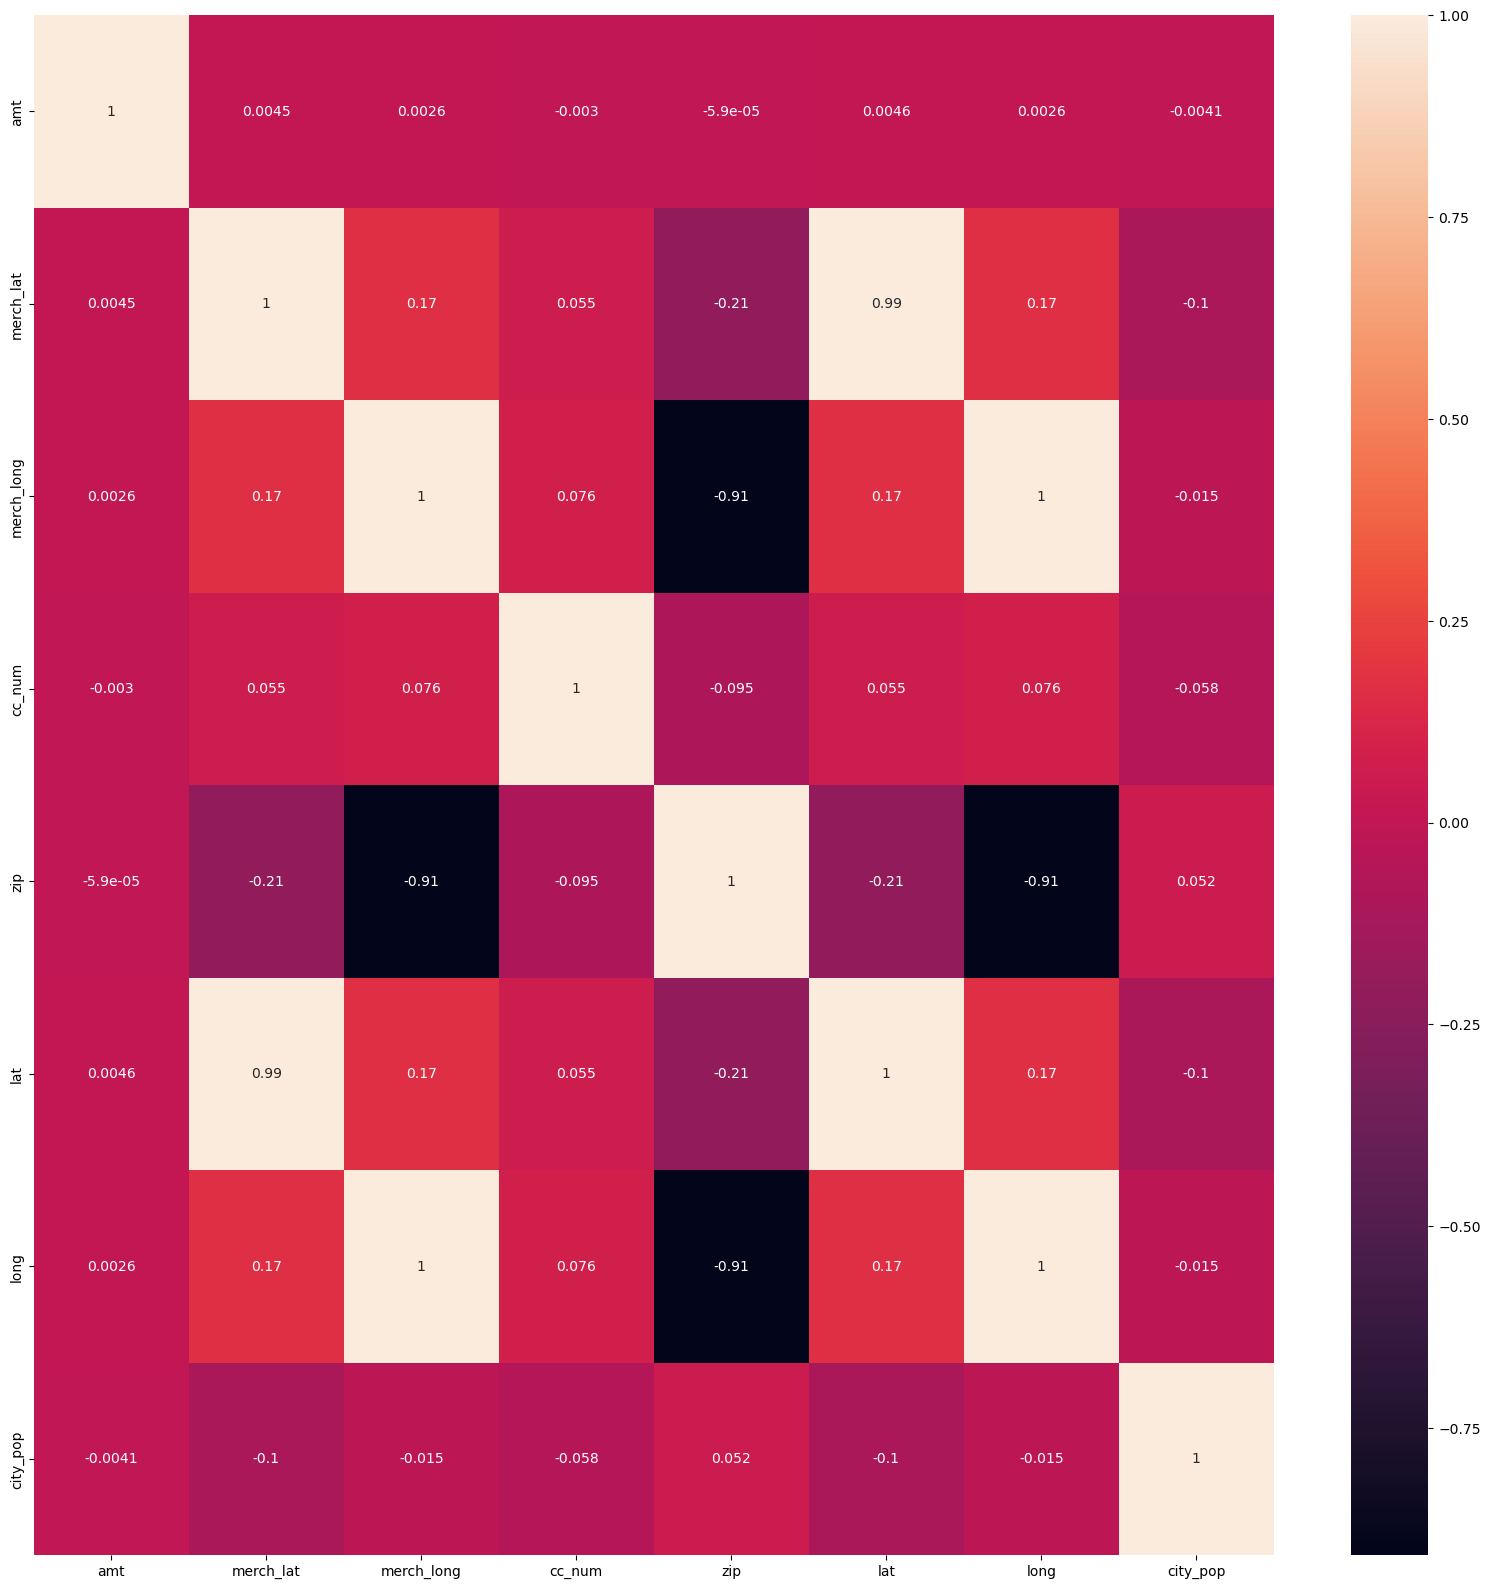

In [21]:
correlations = numerical_cols.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [22]:
# Dropping the Unnecessary column from the dataset
df_merged.drop(['trans_num', 'unix_time', 'ssn', 'cc_num', 'first', 'last', 'street', 'zip', 'lat', 'long'], axis=1, inplace=True)

Calculate Age and Log-Transform Amount

In [23]:
# Calculate age as of today
df_merged['age'] = (datetime.now() - df_merged['dob']).dt.days // 365
df_merged['log_amount'] = np.log(df_merged['amt'] + 1)

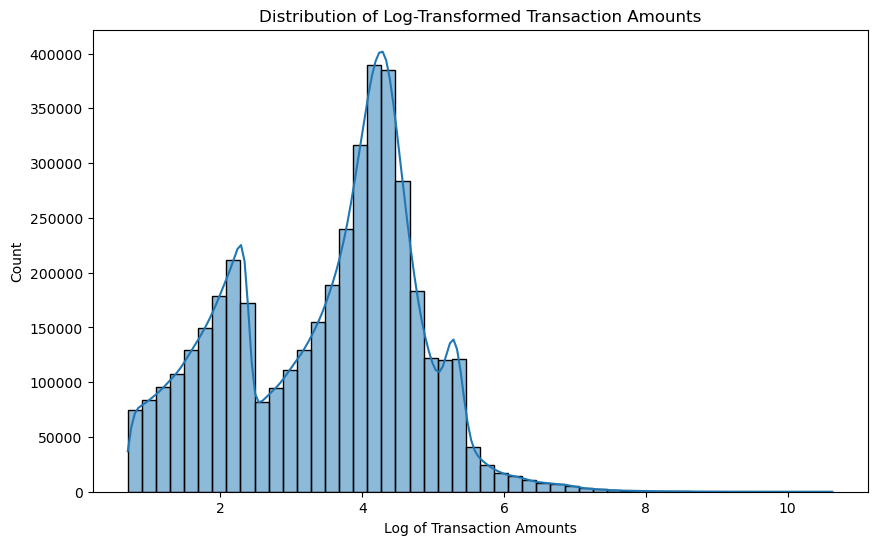

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['log_amount'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Transaction Amounts')
plt.xlabel('Log of Transaction Amounts')
plt.show()

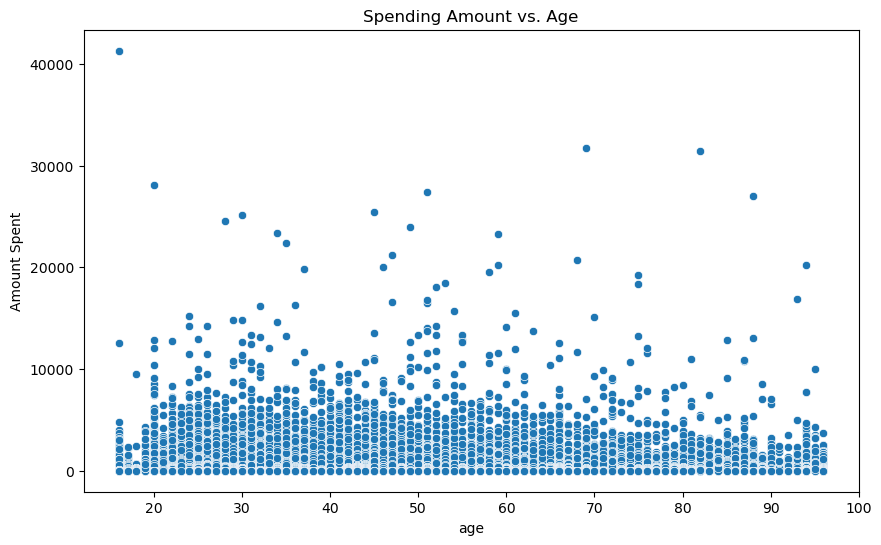

In [25]:
# Scatter plot of amount vs. age (assuming 'age' is a column you have or can calculate)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='amt', data=df_merged)
plt.title('Spending Amount vs. Age')
plt.xlabel('age')
plt.ylabel('Amount Spent')
plt.show()

In [26]:
# Feature Engineering
df_merged['time_stamp'] = pd.to_datetime(df_merged['time_stamp'])
df_merged['month'] = df_merged['time_stamp'].dt.month
df_merged['year'] = df_merged['time_stamp'].dt.year

In [27]:
# Aggregate features per customer per month
agg_features = df_merged.groupby(['acct_num', 'month']).agg({
    'amt': ['sum', 'mean', 'count']
}).reset_index()
agg_features.columns = ['acct_num', 'month', 'total_spent', 'average_spent', 'transaction_count']

In [28]:
agg_features

acct_num  month  total_spent  average_spent  transaction_count
0        2348758451      1     17067.43      72.319619                236
1        2348758451      2     19899.56      82.229587                242
2        2348758451      3     26074.95      83.306550                313
3        2348758451      4     15157.67      52.814181                287
4        2348758451      5     18531.13      57.371920                323
...             ...    ...          ...            ...                ...
11674  999389892260      8     13900.60      48.265972                288
11675  999389892260      9     12068.45      56.659390                213
11676  999389892260     10     13760.58      52.925308                260
11677  999389892260     11     11284.47      49.062913                230
11678  999389892260     12     21126.66      49.476956                427

[11679 rows x 5 columns]

In [29]:
# Merge with demographic data
df_features = pd.merge(df_merged.drop_duplicates(subset='acct_num'), agg_features, on='acct_num', how='left')

In [33]:
df_features

acct_num       category    amt is_fraud        merchant  merch_lat  \
0      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
1      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
2      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
3      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
4      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
...             ...            ...    ...      ...             ...        ...   
11674  899842584633       misc_net  72.15        0       Brown Inc  40.898623   
11675  899842584633       misc_net  72.15        0       Brown Inc  40.898623   
11676  899842584633       misc_net  72.15        0       Brown Inc  40.898623   
11677  899842584633       misc_net  72.15        0       Brown Inc  40.898623   
11678  899842584633       misc_net  72.15        0       Brown Inc  40.898623   

       merch_long          time_stamp gender    city  ...  \
0      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
1      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
2      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
3      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
4      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
...           ...                 ...    ...     ...  ...   
11674  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   
11675  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   
11676  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   
11677  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   
11678  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   

                         job        dob age log_amount  month_x  year  \
0      Accounting technician 1959-10-03  64   4.250208        5  2019   
1      Accounting technician 1959-10-03  64   4.250208        5  2019   
2      Accounting technician 1959-10-03  64   4.250208        5  2019   
3      Accounting technician 1959-10-03  64   4.250208        5  2019   
4      Accounting technician 1959-10-03  64   4.250208        5  2019   
...                      ...        ...  ..        ...      ...   ...   
11674      Chemical engineer 1971-02-18  53   4.292512       12  2019   
11675      Chemical engineer 1971-02-18  53   4.292512       12  2019   
11676      Chemical engineer 1971-02-18  53   4.292512       12  2019   
11677      Chemical engineer 1971-02-18  53   4.292512       12  2019   
11678      Chemical engineer 1971-02-18  53   4.292512       12  2019   

       month_y  total_spent  average_spent  transaction_count  
0            1     12352.73      64.337135                192  
1            2     11746.19      64.186831                183  
2            3     16650.11      72.707904                229  
3            4     14082.16      57.478204                245  
4            5     21188.95      77.331934                274  
...        ...          ...            ...                ...  
11674        8     27371.21      63.359282                432  
11675        9     19286.37      62.618084                308  
11676       10     25567.55      65.557821                390  
11677       11     19574.87      55.296243                354  
11678       12     38309.11      58.666325                653  

[11679 rows x 22 columns]

In [34]:
# Encoding categorical variables and normalizing numerical variables
categorical_features = ['job', 'gender', 'state']
numeric_features = ['average_spent', 'transaction_count', 'city_pop']

### **Split Data into Training and Testing Sets**

In [35]:
# Split the data into training and testing sets
X = df_features.drop(['acct_num', 'total_spent', 'time_stamp'], axis=1)
y = df_features['total_spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Create Baseline Model**

In [36]:
from sklearn.dummy import DummyRegressor

# Create a baseline model using mean prediction
baseline_model = DummyRegressor(strategy='mean')
baseline_model.fit(X_train, y_train)

# Predict and evaluate the baseline model
baseline_pred = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_r2 = r2_score(y_test, baseline_pred)

print(f'Baseline Mean Squared Error: {baseline_mse:.2f}')
print(f'Baseline Mean Absolute Error: {baseline_mae:.2f}')
print(f'Baseline R² Score: {baseline_r2:.2f}')

Baseline Mean Squared Error: 336931735.05
Baseline Mean Absolute Error: 13709.11
Baseline R² Score: -0.00


### **Preprocessing and OneHotEncoder**

In [37]:
# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [38]:
# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### **Train RandomForest Model**

In [39]:
# Create a preprocessing and modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100))])

In [40]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['average_spent',
                                                   'transaction_count',
                                                   'city_pop']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'gender',
                                                   'state'])])),
                ('regressor', RandomForestRegressor())])

In [41]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 733094.084614886


### **Cross-Validation**

In [42]:
# Cross-validation to validate the model
mse_scorer = make_scorer(mean_squared_error)
cv_scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)

In [43]:
print("CV Mean Squared Error scores:", cv_scores)
print("CV Mean MSE:", cv_scores.mean())

CV Mean Squared Error scores: [1616181.16926885  613754.93108748  368404.50972151  285158.17124171
  236009.66809717]
CV Mean MSE: 623901.6898833438


### **Model Performance Metrics**

In [44]:
# Predicting the test set results
y_pred = model.predict(X_test)

In [45]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 220.88


In [46]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 733094.08


In [43]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 848.22


In [47]:
# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.2f}')

R² Score: 1.00


In [48]:
# calculate adjusted R² Score
n = X_test.shape[1]  # Number of features
N = len(y_test)  # Number of observations
adjusted_r2 = 1 - (1 - r2) * (N - 1) / (N - n - 1)
print(f'Adjusted R² Score: {adjusted_r2:.2f}')

Adjusted R² Score: 1.00


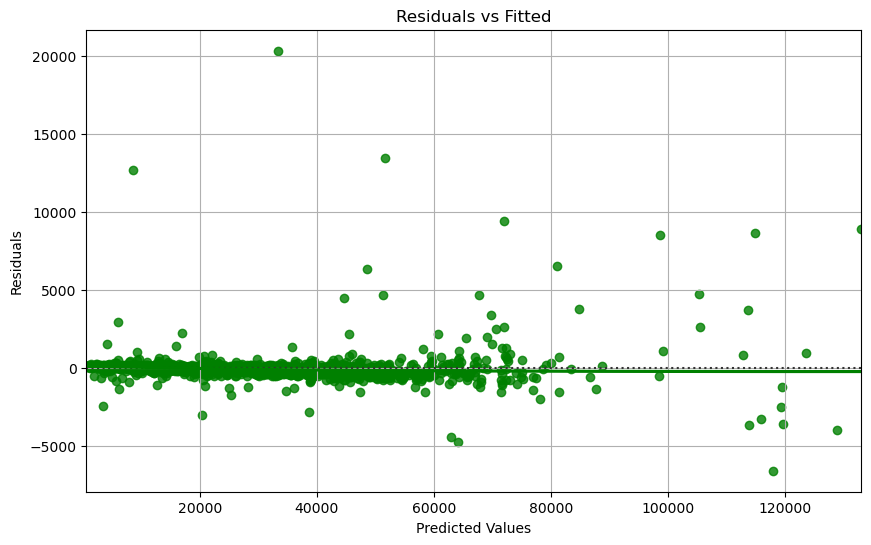

In [49]:
# Plotting residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="g")
plt.title('Residuals vs Fitted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

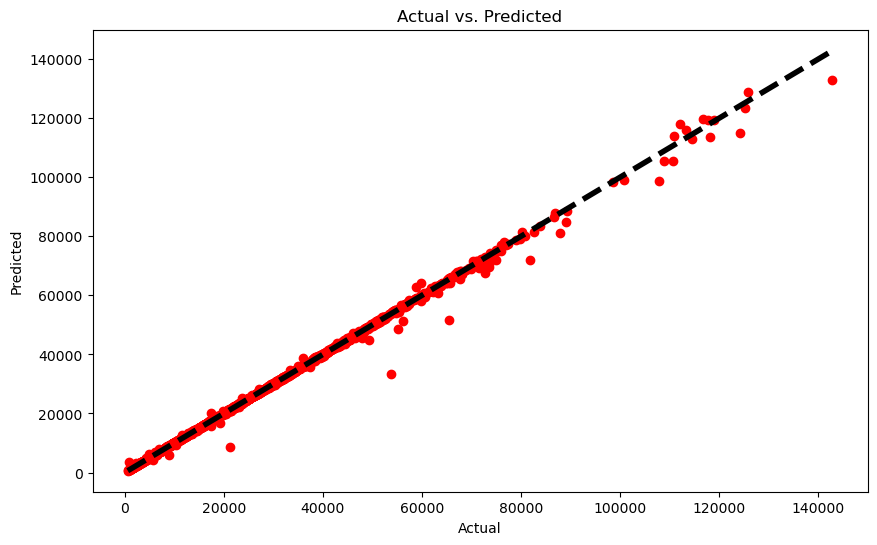

In [50]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### **Save the Model**

In [51]:
# Save the model to disk
dump(model, 'final_model.joblib')

['final_model.joblib']

In [52]:
df_features

acct_num       category    amt is_fraud        merchant  merch_lat  \
0      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
1      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
2      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
3      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
4      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
...             ...            ...    ...      ...             ...        ...   
11674  899842584633       misc_net  72.15        0       Brown Inc  40.898623   
11675  899842584633       misc_net  72.15        0       Brown Inc  40.898623   
11676  899842584633       misc_net  72.15        0       Brown Inc  40.898623   
11677  899842584633       misc_net  72.15        0       Brown Inc  40.898623   
11678  899842584633       misc_net  72.15        0       Brown Inc  40.898623   

       merch_long          time_stamp gender    city  ...  \
0      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
1      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
2      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
3      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
4      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
...           ...                 ...    ...     ...  ...   
11674  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   
11675  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   
11676  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   
11677  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   
11678  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   

                         job        dob age log_amount  month_x  year  \
0      Accounting technician 1959-10-03  64   4.250208        5  2019   
1      Accounting technician 1959-10-03  64   4.250208        5  2019   
2      Accounting technician 1959-10-03  64   4.250208        5  2019   
3      Accounting technician 1959-10-03  64   4.250208        5  2019   
4      Accounting technician 1959-10-03  64   4.250208        5  2019   
...                      ...        ...  ..        ...      ...   ...   
11674      Chemical engineer 1971-02-18  53   4.292512       12  2019   
11675      Chemical engineer 1971-02-18  53   4.292512       12  2019   
11676      Chemical engineer 1971-02-18  53   4.292512       12  2019   
11677      Chemical engineer 1971-02-18  53   4.292512       12  2019   
11678      Chemical engineer 1971-02-18  53   4.292512       12  2019   

       month_y  total_spent  average_spent  transaction_count  
0            1     12352.73      64.337135                192  
1            2     11746.19      64.186831                183  
2            3     16650.11      72.707904                229  
3            4     14082.16      57.478204                245  
4            5     21188.95      77.331934                274  
...        ...          ...            ...                ...  
11674        8     27371.21      63.359282                432  
11675        9     19286.37      62.618084                308  
11676       10     25567.55      65.557821                390  
11677       11     19574.87      55.296243                354  
11678       12     38309.11      58.666325                653  

[11679 rows x 22 columns]

In [53]:
df_recent = df_features[df_features['time_stamp'] == df_features.groupby('acct_num')['time_stamp'].transform(max)]

In [54]:
df_recent

acct_num       category    amt is_fraud        merchant  merch_lat  \
0      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
1      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
2      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
3      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
4      888022315787  gas_transport  69.12        0  Phillips Group  39.491416   
...             ...            ...    ...      ...             ...        ...   
11674  899842584633       misc_net  72.15        0       Brown Inc  40.898623   
11675  899842584633       misc_net  72.15        0       Brown Inc  40.898623   
11676  899842584633       misc_net  72.15        0       Brown Inc  40.898623   
11677  899842584633       misc_net  72.15        0       Brown Inc  40.898623   
11678  899842584633       misc_net  72.15        0       Brown Inc  40.898623   

       merch_long          time_stamp gender    city  ...  \
0      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
1      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
2      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
3      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
4      -75.588522 2019-05-24 17:39:10      M  Ambler  ...   
...           ...                 ...    ...     ...  ...   
11674  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   
11675  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   
11676  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   
11677  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   
11678  -88.895159 2019-12-07 19:15:17      M  Peoria  ...   

                         job        dob age log_amount  month_x  year  \
0      Accounting technician 1959-10-03  64   4.250208        5  2019   
1      Accounting technician 1959-10-03  64   4.250208        5  2019   
2      Accounting technician 1959-10-03  64   4.250208        5  2019   
3      Accounting technician 1959-10-03  64   4.250208        5  2019   
4      Accounting technician 1959-10-03  64   4.250208        5  2019   
...                      ...        ...  ..        ...      ...   ...   
11674      Chemical engineer 1971-02-18  53   4.292512       12  2019   
11675      Chemical engineer 1971-02-18  53   4.292512       12  2019   
11676      Chemical engineer 1971-02-18  53   4.292512       12  2019   
11677      Chemical engineer 1971-02-18  53   4.292512       12  2019   
11678      Chemical engineer 1971-02-18  53   4.292512       12  2019   

       month_y  total_spent  average_spent  transaction_count  
0            1     12352.73      64.337135                192  
1            2     11746.19      64.186831                183  
2            3     16650.11      72.707904                229  
3            4     14082.16      57.478204                245  
4            5     21188.95      77.331934                274  
...        ...          ...            ...                ...  
11674        8     27371.21      63.359282                432  
11675        9     19286.37      62.618084                308  
11676       10     25567.55      65.557821                390  
11677       11     19574.87      55.296243                354  
11678       12     38309.11      58.666325                653  

[11679 rows x 22 columns]

### **Load Model and Make Predictions**

In [55]:
model = load('final_model.joblib')

In [56]:
# Make predictions
# Ensure df_recent is structured and processed exactly like the training data
predictions = model.predict(df_recent.drop(['acct_num', 'total_spent', 'time_stamp'], axis=1))

In [57]:
# Combine predictions with account numbers for readability
predicted_spending = pd.DataFrame({
    'acct_num': df_recent['acct_num'],
    'predicted_spending': predictions
})

In [58]:
print(predicted_spending)

           acct_num  predicted_spending
0      888022315787          12419.6124
1      888022315787          11735.2319
2      888022315787          16619.7173
3      888022315787          14103.3282
4      888022315787          21260.3458
...             ...                 ...
11674  899842584633          27367.4238
11675  899842584633          19258.3901
11676  899842584633          25488.2626
11677  899842584633          19499.9239
11678  899842584633          38253.7006

[11679 rows x 2 columns]


In [59]:
predicted_spending

acct_num  predicted_spending
0      888022315787          12419.6124
1      888022315787          11735.2319
2      888022315787          16619.7173
3      888022315787          14103.3282
4      888022315787          21260.3458
...             ...                 ...
11674  899842584633          27367.4238
11675  899842584633          19258.3901
11676  899842584633          25488.2626
11677  899842584633          19499.9239
11678  899842584633          38253.7006

[11679 rows x 2 columns]